In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import matplotlib
from wordcloud import WordCloud

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import seaborn as sns
import missingno as msno
import warnings 
warnings.filterwarnings("ignore") 

In [35]:
df= pd.read_csv('성별, 직업에 따른.csv')
df

,성별,직업,수입노동,유연근무,재택근무
0,남성,농축수산/광업,많이 증가,조금 증가,많이 증가
1,남성,사무직,많이 감소,조금 감소,조금 감소
2,여성,전업주부,많이 감소,많이 감소,많이 감소
3,남성,사무직,조금 감소,해당없음,해당없음
4,남성,경영관리직,변화없음,변화없음,변화없음
...,...,...,...,...,...
995,남성,경영관리직,조금 감소,변화없음,조금 증가
996,여성,사무직,조금 감소,조금 감소,조금 증가
997,여성,무직/퇴직,변화없음,변화없음,변화없음
998,여성,무직/퇴직,해당없음,NaN,NaN


In [24]:
df.isnull().sum()

성별       0
직업       0
수입노동     0
유연근무    82
재택근무    82
dtype: int64

In [25]:
df['유연근무'] = df['유연근무'].fillna('변화없음')
df['유연근무'].value_counts()

변화없음     539
해당없음     179
조금 증가    135
조금 감소     63
많이 감소     43
많이 증가     41
Name: 유연근무, dtype: int64

In [26]:
df['재택근무'] = df['재택근무'].fillna('변화없음')
df['재택근무'].value_counts()

변화없음     509
해당없음     247
조금 증가    141
많이 증가     73
조금 감소     18
많이 감소     12
Name: 재택근무, dtype: int64

In [27]:
df.isnull().sum()

성별      0
직업      0
수입노동    0
유연근무    0
재택근무    0
dtype: int64

In [28]:
df['직업'].value_counts()

사무직        353
전업주부       162
무직/퇴직       89
전문직         67
자영/판매업      60
학생          52
기능직         44
기타          41
서비스직        37
노무직         30
기술전문직       29
경영관리직       28
농축수산/광업      8
Name: 직업, dtype: int64

In [43]:
df.groupby('직업').size()

직업
경영관리직       28
기능직         44
기술전문직       29
기타          41
노무직         30
농축수산/광업      8
무직/퇴직       89
사무직        353
서비스직        37
자영/판매업      60
전문직         67
전업주부       162
학생          52
dtype: int64

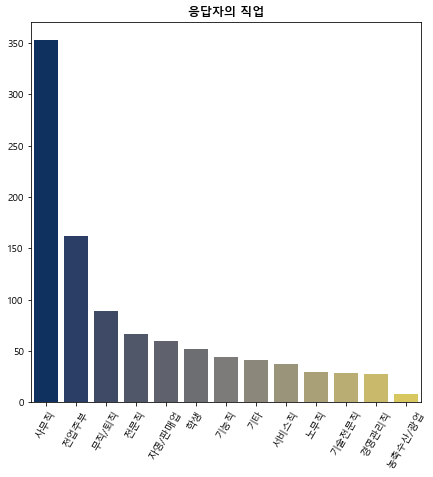

In [48]:
plt.figure(figsize=(7,7)) 
sns.barplot(x = df["직업"].value_counts().index,
            y = df["직업"].value_counts().values,palette="cividis") 
plt.xticks(rotation=60) 
plt.title("응답자의 직업",fontweight="bold") 
plt.rcParams["font.family"]="Malgun Gothic"
plt.show()

In [58]:
a=df.groupby(['직업','재택근무']).size()

In [60]:
a

직업     재택근무 
경영관리직  많이 증가     3
       변화없음     17
       조금 증가     4
       해당없음      4
기능직    많이 감소     1
                ..
전업주부   해당없음     53
학생     많이 증가     7
       변화없음     19
       조금 증가     5
       해당없음     10
Length: 67, dtype: int64

In [61]:
job=pd.DataFrame(a)
job.to_csv('직업재택')
job1=pd.read_csv('직업재택')
job1

,직업,재택근무,0
0,경영관리직,많이 증가,3
1,경영관리직,변화없음,17
2,경영관리직,조금 증가,4
3,경영관리직,해당없음,4
4,기능직,많이 감소,1
...,...,...,...
62,전업주부,해당없음,53
63,학생,많이 증가,7
64,학생,변화없음,19
65,학생,조금 증가,5


Text(0.5, 1.0, '직업에 따른 재택근무의 변화')

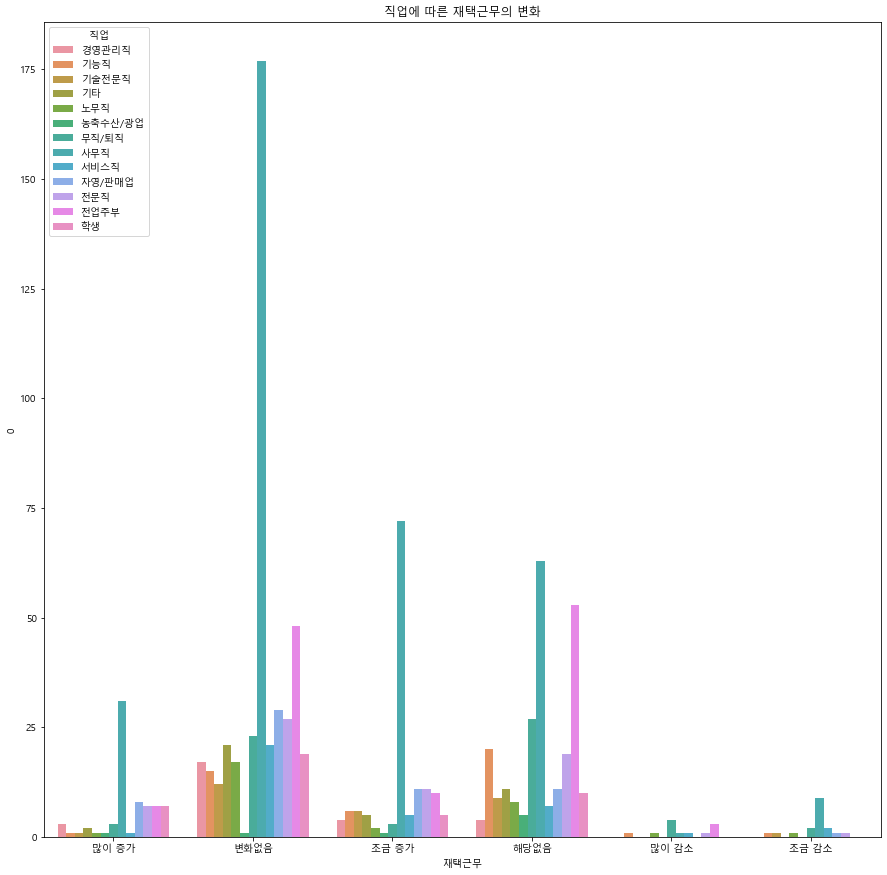

In [64]:
plt.figure(figsize=(15,15)) 
sns.barplot(x='재택근무', y='0',hue='직업',data=job1)
plt.title("직업에 따른 재택근무의 변화")

Text(0.5, 1.0, '직업에 따른 재택근무의 변화')

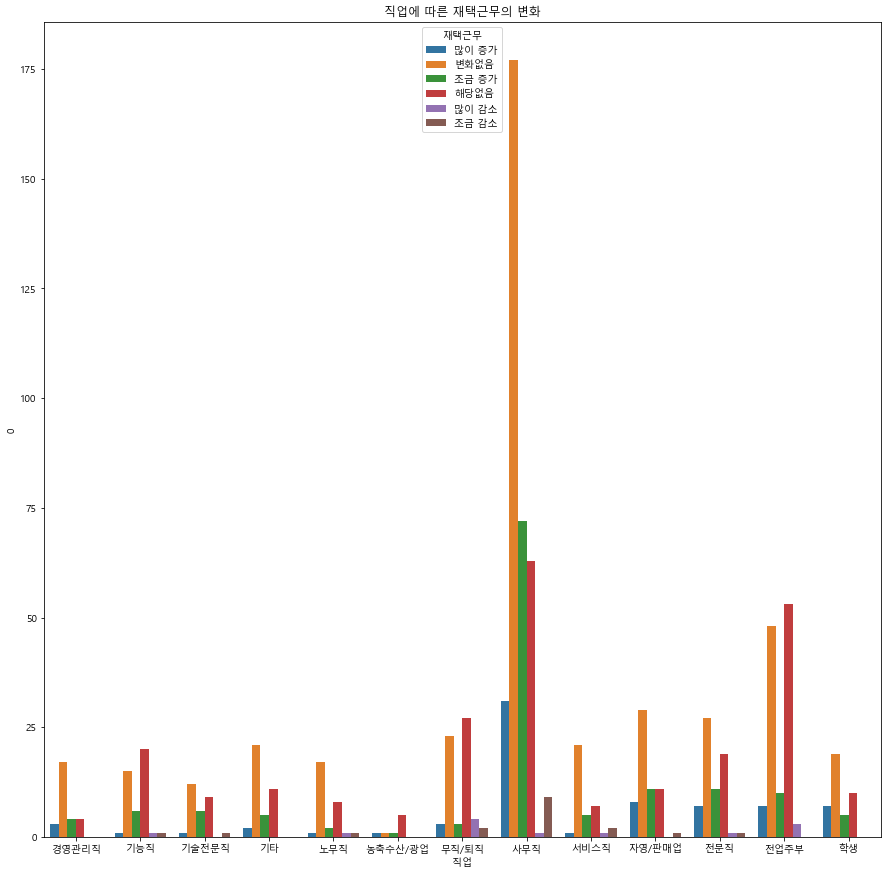

In [67]:
plt.figure(figsize=(15,15)) 
sns.barplot(x='직업', y='0',hue='재택근무',data=job1)
plt.title("직업에 따른 재택근무의 변화")

In [68]:
b=df.groupby(['직업','유연근무']).size()

In [69]:
jo=pd.DataFrame(b)
jo.to_csv('직업유연')
job2=pd.read_csv('직업유연')
job2

,직업,유연근무,0
0,경영관리직,많이 감소,1
1,경영관리직,변화없음,17
2,경영관리직,조금 증가,6
3,경영관리직,해당없음,4
4,기능직,많이 감소,1
...,...,...,...
65,학생,많이 증가,5
66,학생,변화없음,17
67,학생,조금 감소,4
68,학생,조금 증가,5


Text(0.5, 1.0, '직업에 따른 유연근무의 변화')

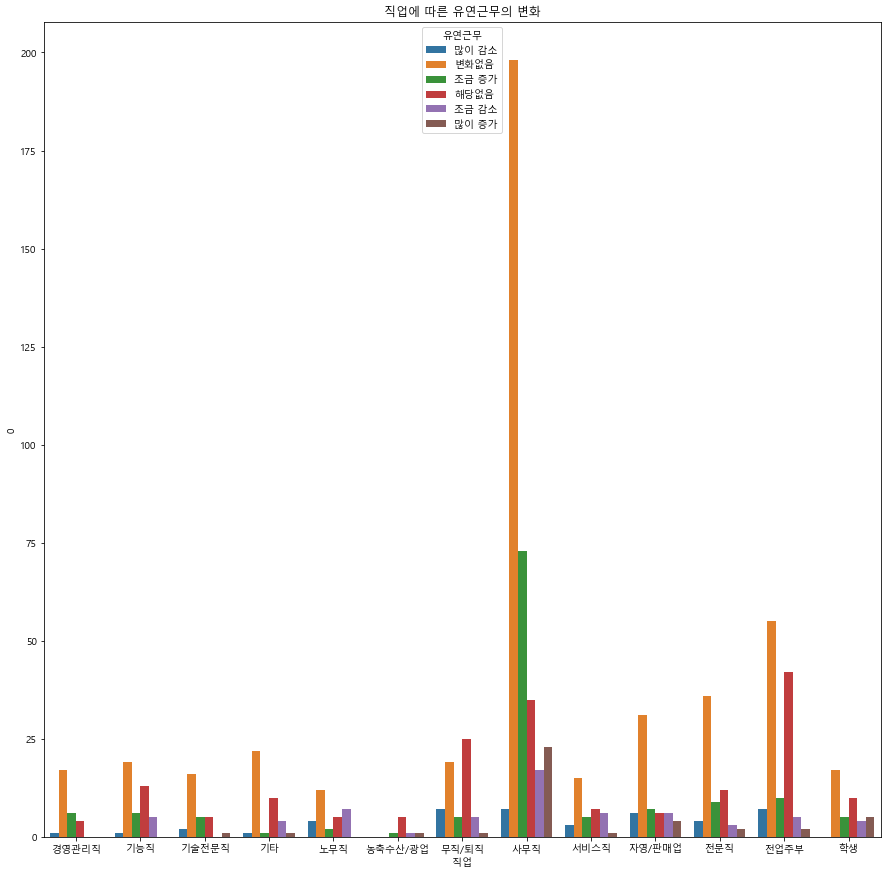

In [70]:
plt.figure(figsize=(15,15)) 
sns.barplot(x='직업', y='0',hue='유연근무',data=job2)
plt.title("직업에 따른 유연근무의 변화")

In [71]:
c=df.groupby(['직업','수입노동']).size()

In [72]:
j=pd.DataFrame(c)
j.to_csv('직업수입')
job3=pd.read_csv('직업수입')
job3

,직업,수입노동,0
0,경영관리직,많이 감소,3
1,경영관리직,변화없음,16
2,경영관리직,조금 감소,8
3,경영관리직,조금 증가,1
4,기능직,많이 감소,6
...,...,...,...
58,학생,많이 증가,2
59,학생,변화없음,17
60,학생,조금 감소,13
61,학생,조금 증가,3


Text(0.5, 1.0, '직업에 따른 수입노동의 변화')

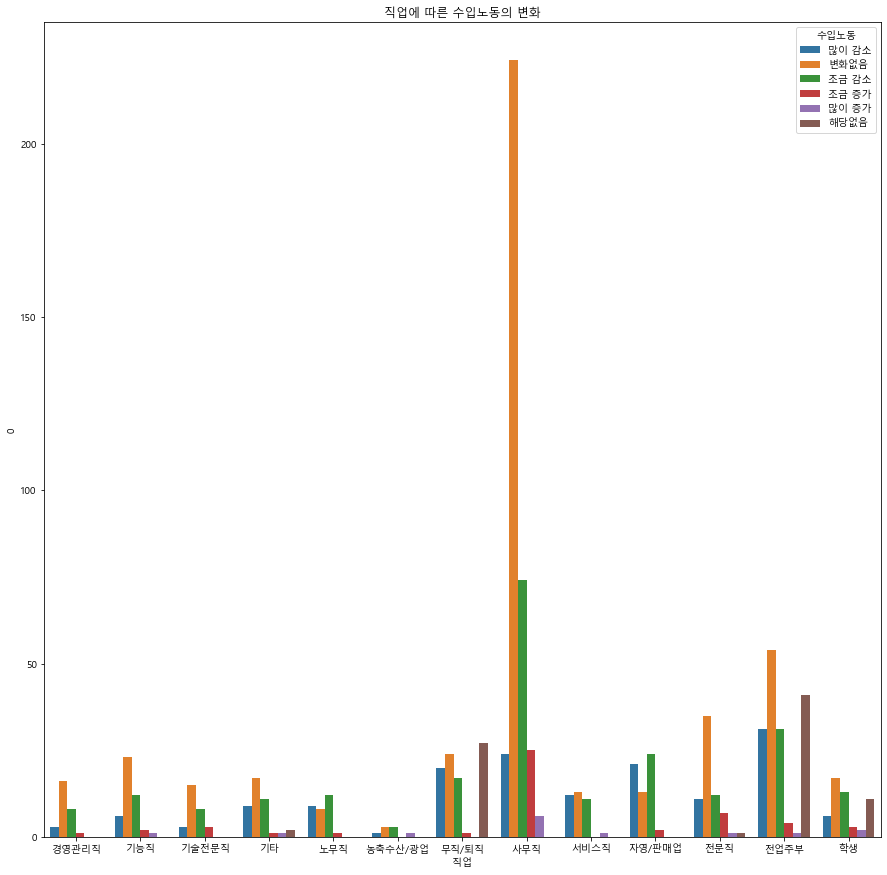

In [73]:
plt.figure(figsize=(15,15)) 
sns.barplot(x='직업', y='0',hue='수입노동',data=job3)
plt.title("직업에 따른 수입노동의 변화")